<a href="https://colab.research.google.com/github/tanvi-10/tanvi-10/blob/main/EDA_theory_da.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#Tanvi Agrawal
#21BDS0178
#Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [5]:
# Load the dataset
file_path = 'econmath.csv'
data = pd.read_csv(file_path)

# Inspect the data
print("Data Overview:")
print(data.info())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  856 non-null    int64  
 1   age       856 non-null    int64  
 2   work      856 non-null    float64
 3   study     856 non-null    float64
 4   econhs    856 non-null    int64  
 5   colgpa    856 non-null    float64
 6   hsgpa     856 non-null    float64
 7   acteng    814 non-null    float64
 8   actmth    814 non-null    float64
 9   act       814 non-null    float64
 10  mathscr   856 non-null    int64  
 11  male      856 non-null    int64  
 12  calculus  856 non-null    int64  
 13  attexc    856 non-null    int64  
 14  attgood   856 non-null    int64  
 15  fathcoll  856 non-null    int64  
 16  mothcoll  856 non-null    int64  
 17  score     856 non-null    float64
dtypes: float64(8), int64(10)
memory usage: 120.5 KB
None


In [6]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

# Check for duplicate rows
print("\nNumber of Duplicate Rows:", data.duplicated().sum())


Missing Values in Each Column:
rownames     0
age          0
work         0
study        0
econhs       0
colgpa       0
hsgpa        0
acteng      42
actmth      42
act         42
mathscr      0
male         0
calculus     0
attexc       0
attgood      0
fathcoll     0
mothcoll     0
score        0
dtype: int64

Number of Duplicate Rows: 0


In [7]:
# Drop the 'rownames' column because it is just an index
if 'rownames' in data.columns:
    data.drop(columns=['rownames'], inplace=True)

In [9]:
# Handle missing values
# Impute missing values for numerical columns using the mean
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])
print(data.head())

    age  work  study  econhs  colgpa  hsgpa  acteng  actmth   act  mathscr  \
0  23.0  15.0   10.0     0.0  3.4909  3.355    24.0    26.0  27.0     10.0   
1  23.0   0.0   22.5     1.0  2.1000  3.219    23.0    20.0  24.0      9.0   
2  21.0  25.0   12.0     0.0  3.0851  3.306    21.0    24.0  21.0      8.0   
3  22.0  30.0   40.0     0.0  2.6805  3.977    31.0    28.0  31.0     10.0   
4  22.0  25.0   15.0     1.0  3.7454  3.890    28.0    31.0  32.0      8.0   

   male  calculus  attexc  attgood  fathcoll  mothcoll  score  
0   1.0       1.0     0.0      0.0       1.0       1.0  84.43  
1   1.0       0.0     0.0      0.0       0.0       1.0  57.38  
2   1.0       1.0     1.0      0.0       0.0       1.0  66.39  
3   0.0       1.0     0.0      1.0       1.0       1.0  81.15  
4   1.0       1.0     0.0      1.0       0.0       1.0  95.90  


               age       work      study    econhs        colgpa  \
50%       0.090909   8.000000  12.000000  0.000000 -3.329490e-03   
act            NaN        NaN        NaN       NaN           NaN   
acteng         NaN        NaN        NaN       NaN           NaN   
actmth         NaN        NaN        NaN       NaN           NaN   
age            NaN        NaN        NaN       NaN           NaN   
attexc         NaN        NaN        NaN       NaN           NaN   
attgood        NaN        NaN        NaN       NaN           NaN   
calculus       NaN        NaN        NaN       NaN           NaN   
colgpa         NaN        NaN        NaN       NaN           NaN   
econhs         NaN        NaN        NaN       NaN           NaN   
fathcoll       NaN        NaN        NaN       NaN           NaN   
hsgpa          NaN        NaN        NaN       NaN           NaN   
male           NaN        NaN        NaN       NaN           NaN   
mathscr        NaN        NaN        NaN       N

<Figure size 1200x800 with 0 Axes>

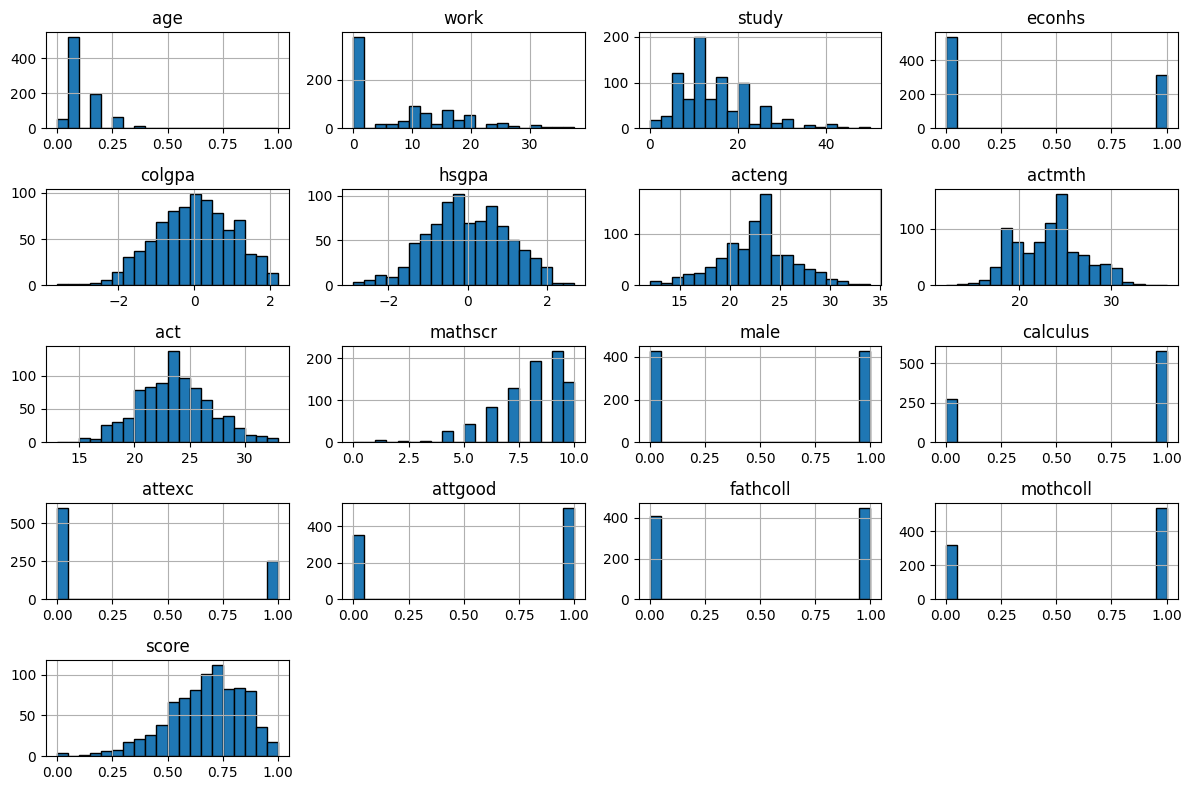

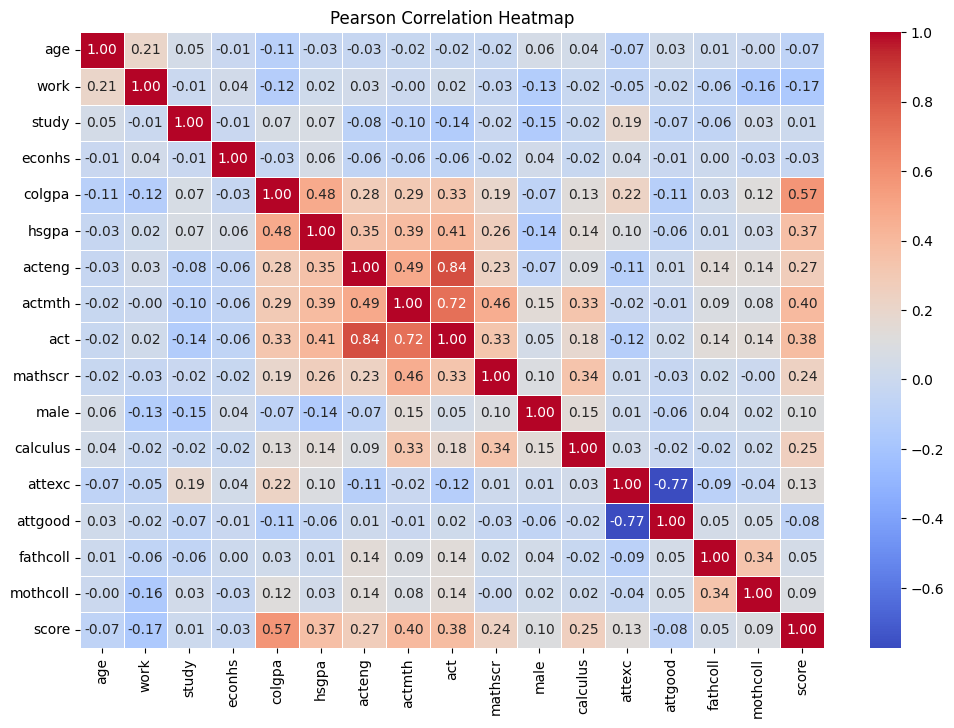

In [12]:
#Data transformation

# 1. Feature Scaling

# Min-Max Scaling for bounded features (e.g., age, salary between known min and max)
def min_max_scaling(data, cols):
    scaler = MinMaxScaler()
    data[cols] = scaler.fit_transform(data[cols])
    return data

# Z-Score Standardization for unbounded features
def z_score_standardization(data, cols):
    scaler = StandardScaler()
    data[cols] = scaler.fit_transform(data[cols])
    return data

# 2. Log Transformation to reduce skewness (positive skewed)
def log_transform(data, cols):
    for col in cols:
        if skew(data[col]) > 1:  # Check if the feature is positively skewed
            data[col] = np.log1p(data[col])  # Log transform with log(1+x) to handle zero values
    return data

# 3. Extract Date/Time Features (if there's a date column)
def extract_datetime_features(data, date_col):
    data['year'] = data[date_col].dt.year
    data['month'] = data[date_col].dt.month
    data['day'] = data[date_col].dt.day
    data['hour'] = data[date_col].dt.hour
    return data

# 4. Combining Features (e.g., "total_price = quantity * price")
def combine_features(data):
    # Example of combining features to create new ones
    if 'quantity' in data.columns and 'price' in data.columns:
        data['total_price'] = data['quantity'] * data['price']
    return data

# 5. Binning (e.g., age groups: child, adult, senior)
def binning(data, col, bins, labels):
    data[col + '_bin'] = pd.cut(data[col], bins=bins, labels=labels)
    return data

# Feature Scaling: Example usage
data = min_max_scaling(data, ['age', 'score'])
data = z_score_standardization(data, ['hsgpa', 'colgpa'])
# Log transformation: Apply on positively skewed features (replace 'mathscr' with actual skewed features)
data = log_transform(data, ['mathscr', 'actmth'])

# Date/Time Features (Example: Assuming there's a 'date' column)
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])  # Convert to datetime format
    data = extract_datetime_features(data, 'date')

# Combining Features: Create new features
data = combine_features(data)

# Binning: Example with 'age' column (replace with your continuous feature)
bins = [0, 18, 40, 65, 100]  # Age bins: child, adult, senior
labels = ['child', 'adult', 'senior', 'elder']

data = binning(data, 'age', bins, labels)


# 2. Data Summarization

# Central Tendency (Mean, Median, Mode)
central_tendency = data.describe().loc[['mean', '50%', 'min', 'max']]
central_tendency.loc['mode'] = data.mode().iloc[0]

# Dispersion (Range, Variance, Standard Deviation, IQR)
# Select only numerical columns
numerical_data = data.select_dtypes(include=[np.number])

dispersion = {
    'range': numerical_data.max() - numerical_data.min(),
    'variance': numerical_data.var(),
    'std_dev': numerical_data.std(),
    'iqr': numerical_data.quantile(0.75) - numerical_data.quantile(0.25)
}


# Shape (Skewness, Kurtosis)
numerical_data = data.select_dtypes(include=[np.number])

# Shape: Skewness, Kurtosis
shape = pd.DataFrame({
    'skewness': numerical_data.skew(),
    'kurtosis': numerical_data.apply(lambda x: kurtosis(x, nan_policy='omit'))
})

# Combine with previous summary statistics
summary = pd.DataFrame({**central_tendency, **dispersion, **shape})
print(summary)


# Counts (Unique values, Missing values, Class Distribution)
# Counts (Unique values, Missing values, Class Distribution)
counts = pd.DataFrame({
    'unique_values': data.nunique(),
    'missing_values': data.isnull().sum(),
    'class_distribution': data.apply(lambda x: x.value_counts() if x.dtype == 'object' else 'Not Applicable')
})




# Correlations (Pearson, Spearman, Kendall)
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=[np.number])

# Correlations (Pearson, Spearman, Kendall)
correlation_pearson = numerical_data.corr(method='pearson')
correlation_spearman = numerical_data.corr(method='spearman')
correlation_kendall = numerical_data.corr(method='kendall')



# Display results
print("Central Tendency:\n", central_tendency)
print("\nDispersion:\n", dispersion)
print("\nShape (Skewness & Kurtosis):\n", shape)
print("\nCounts (Unique, Missing, Distribution):\n", counts)
print("\nPearson Correlation:\n", correlation_pearson)
print("\nSpearman Correlation:\n", correlation_spearman)
print("\nKendall Correlation:\n", correlation_kendall)

# Visualizations (e.g., histograms for distribution)
plt.figure(figsize=(12, 8))
data.hist(bins=20, edgecolor='black', figsize=(12, 8))
plt.tight_layout()
plt.show()

# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_pearson, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Pearson Correlation Heatmap")
plt.show()


In [13]:
#Verify the preprocessing
print("\nProcessed Data Overview:")
print(data.info())


Processed Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       856 non-null    float64 
 1   work      856 non-null    float64 
 2   study     856 non-null    float64 
 3   econhs    856 non-null    float64 
 4   colgpa    856 non-null    float64 
 5   hsgpa     856 non-null    float64 
 6   acteng    856 non-null    float64 
 7   actmth    856 non-null    float64 
 8   act       856 non-null    float64 
 9   mathscr   856 non-null    float64 
 10  male      856 non-null    float64 
 11  calculus  856 non-null    float64 
 12  attexc    856 non-null    float64 
 13  attgood   856 non-null    float64 
 14  fathcoll  856 non-null    float64 
 15  mothcoll  856 non-null    float64 
 16  score     856 non-null    float64 
 17  age_bin   802 non-null    category
dtypes: category(1), float64(17)
memory usage: 114.8 KB
None


In [14]:
# Feature Engineering
import numpy as np

# 1. Combine ACT scores
data['act_total'] = data[['acteng', 'actmth', 'act']].mean(axis=1)

# 2. Attendance quality index
data['attendance_quality'] = data['attexc'] + data['attgood']

# 3. Log-transformed GPA (handle potential negative or zero values by adding a small constant)
data['log_colgpa'] = np.log(data['colgpa'] + 1e-5)
data['log_hsgpa'] = np.log(data['hsgpa'] + 1e-5)

# 4. Proportions of time spent working and studying
data['work_proportion'] = data['work'] / (data['work'] + data['study'])
data['study_proportion'] = data['study'] / (data['work'] + data['study'])

# 5. Parent education index
data['parent_edu_index'] = data['fathcoll'] + data['mothcoll']

# 6. Academic effort index (arbitrary weights for demonstration)
data['academic_effort_index'] = 0.5 * data['study'] + 0.3 * data['work'] + 0.2 * data['attendance_quality']

# 7. Math to overall score ratio
data['math_to_score_ratio'] = data['mathscr'] / (data['score'] + 1e-5)

# 8. GPA improvement rate
data['gpa_improvement'] = data['colgpa'] - data['hsgpa']

# Check the updated dataset
print("Newly engineered features:")
print(data[['act_total', 'attendance_quality', 'log_colgpa', 'work_proportion', 'parent_edu_index']].head())


Newly engineered features:
   act_total  attendance_quality  log_colgpa  work_proportion  \
0  25.666667                 0.0    0.231351         0.600000   
1  22.333333                 0.0         NaN         0.000000   
2  22.000000                 1.0   -0.685193         0.675676   
3  30.000000                 1.0         NaN         0.428571   
4  30.333333                 1.0    0.550792         0.625000   

   parent_edu_index  
0               2.0  
1               1.0  
2               1.0  
3               2.0  
4               1.0  


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Univariate Analysis


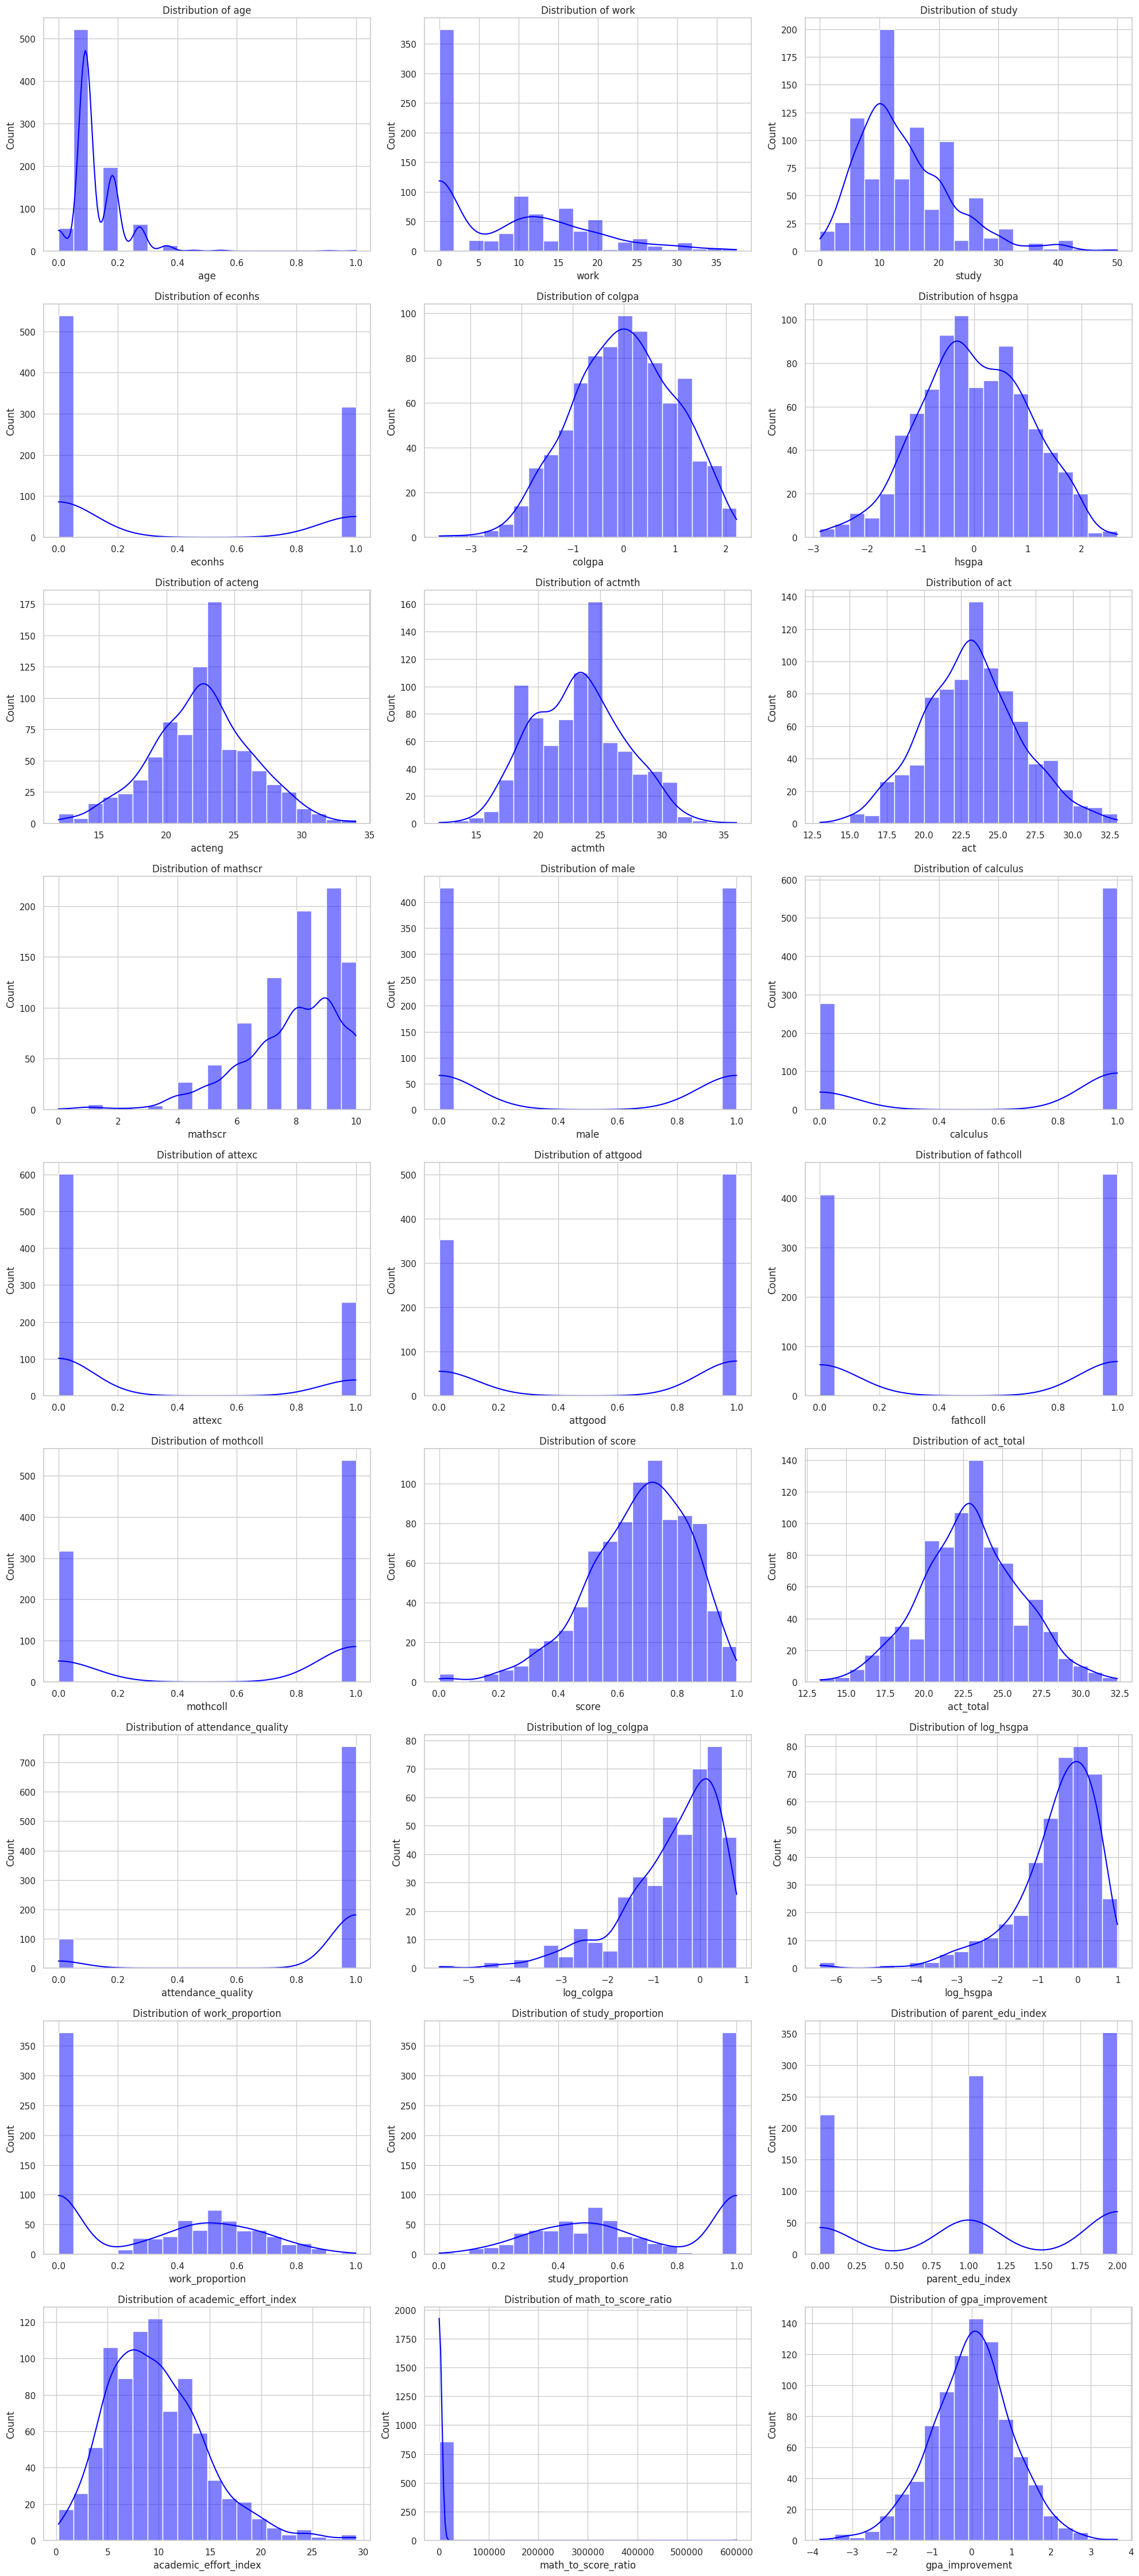

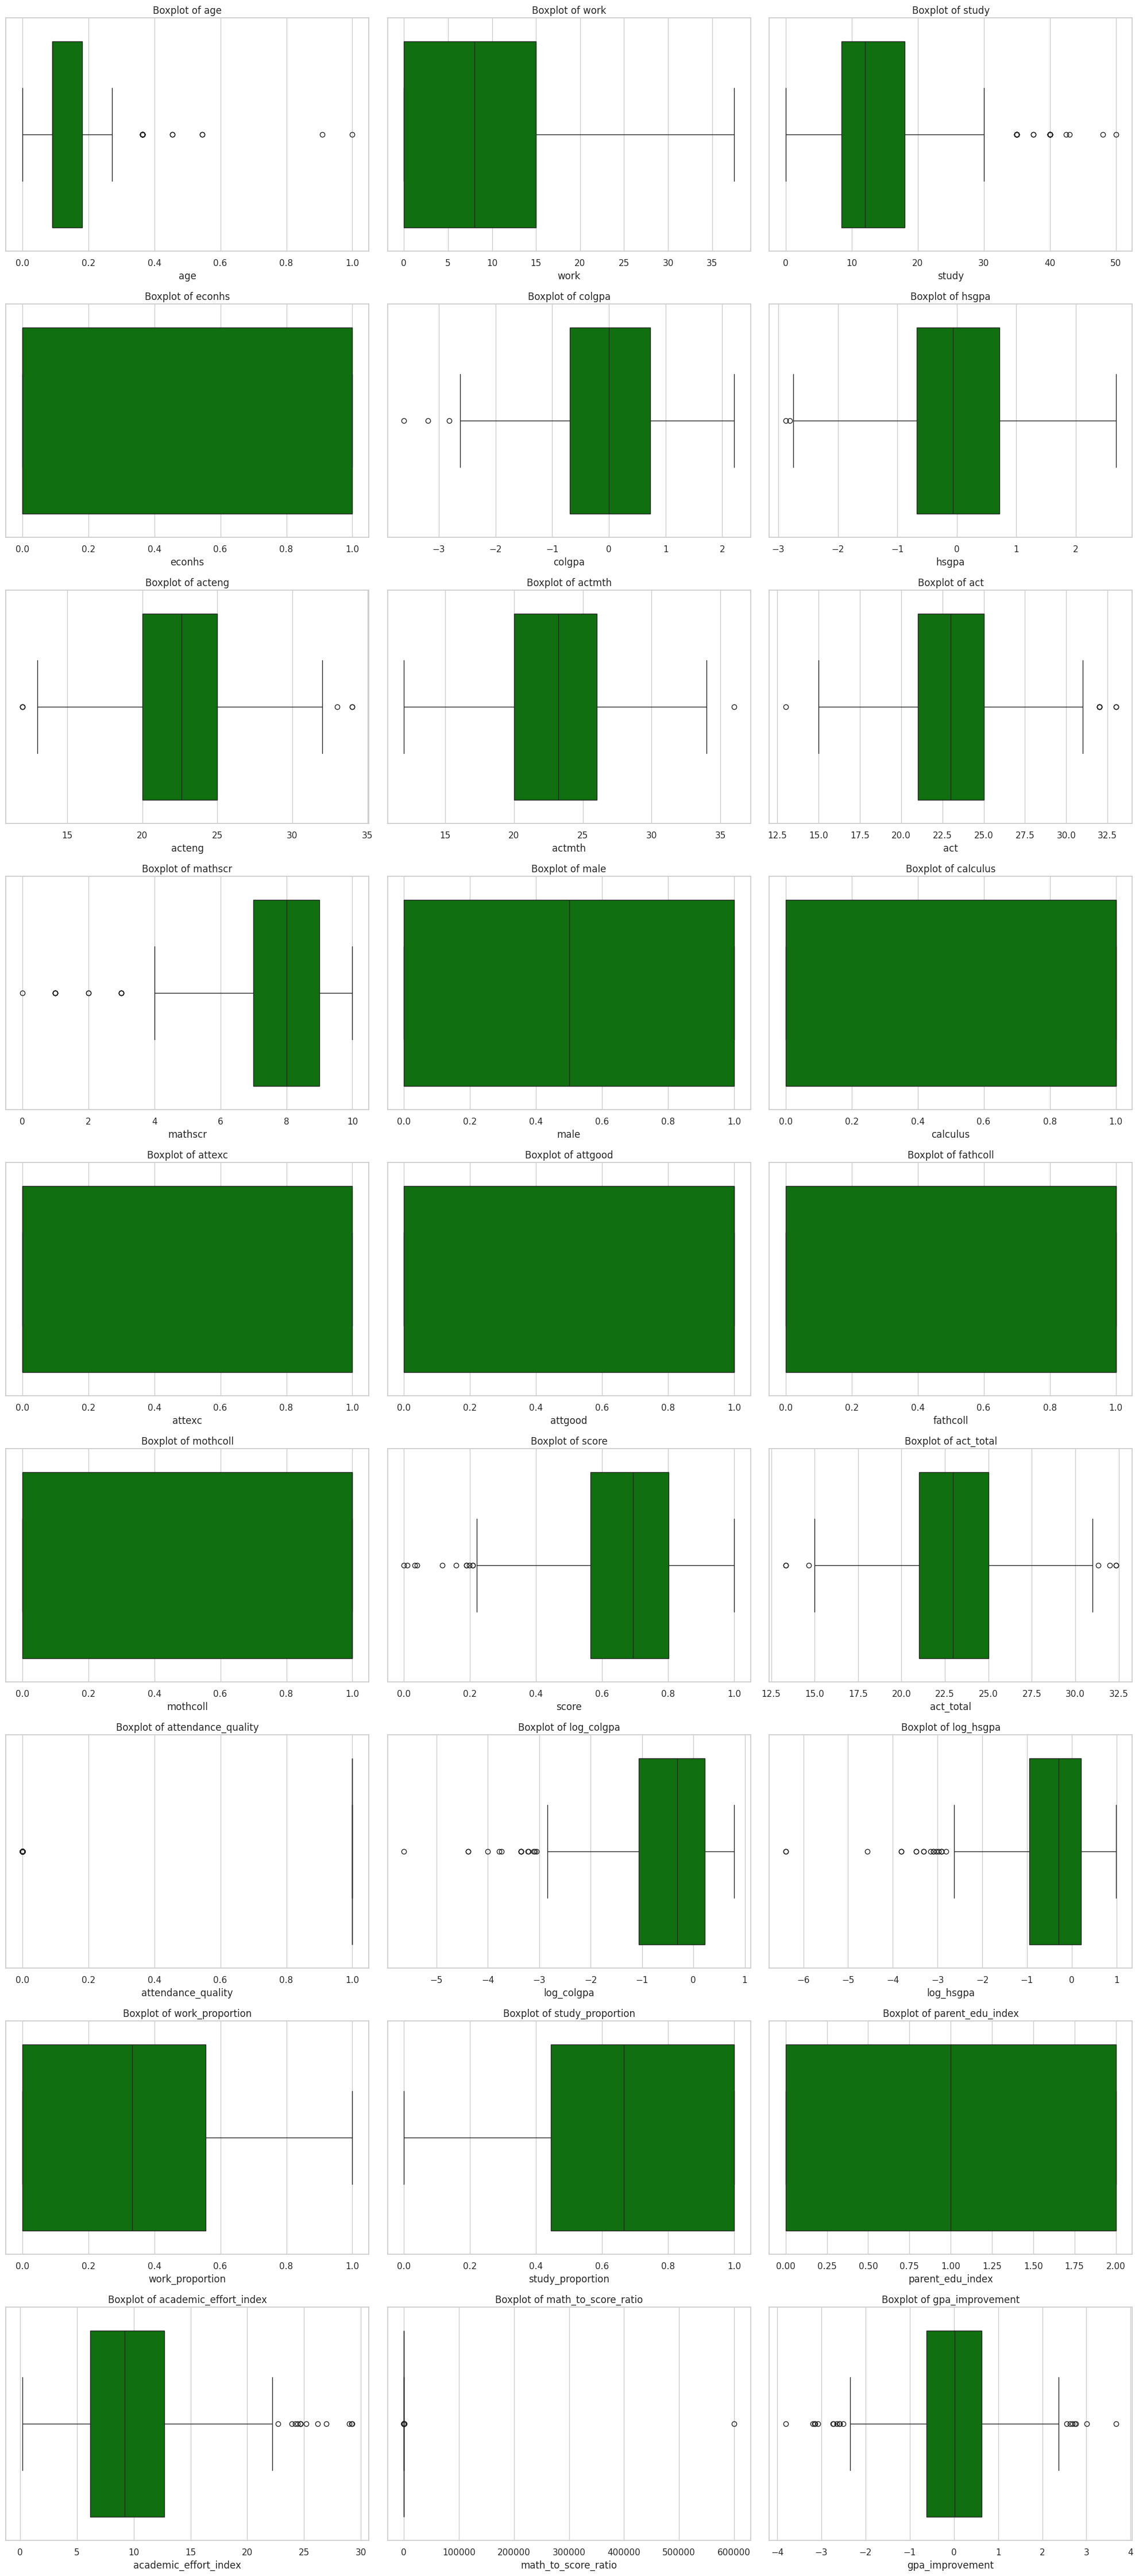

Bivariate Analysis


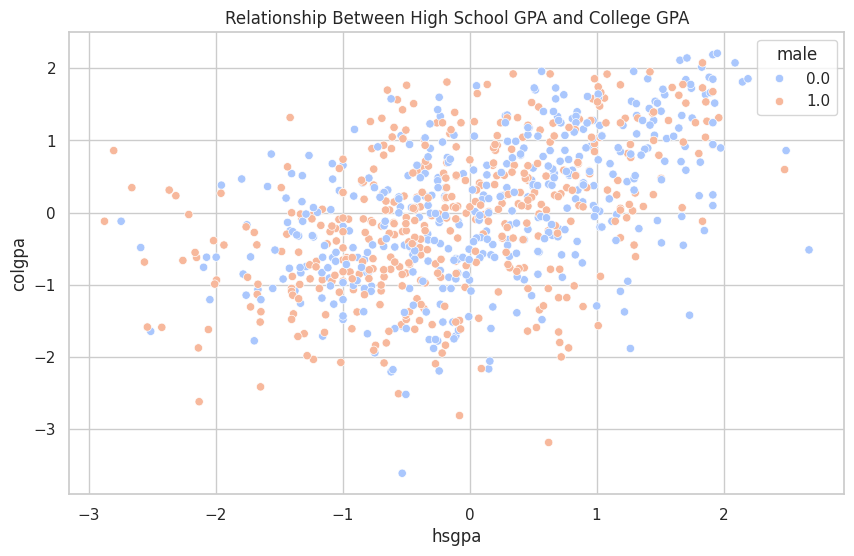

Multivariate Analysis


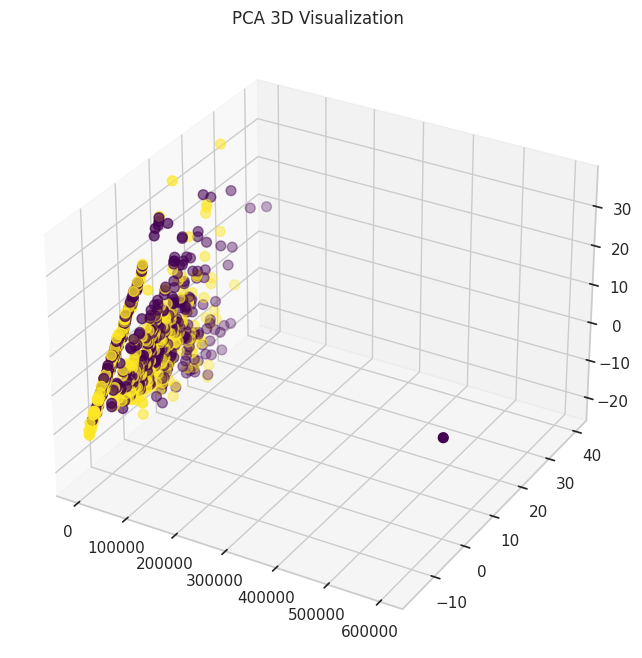

Outlier Detection


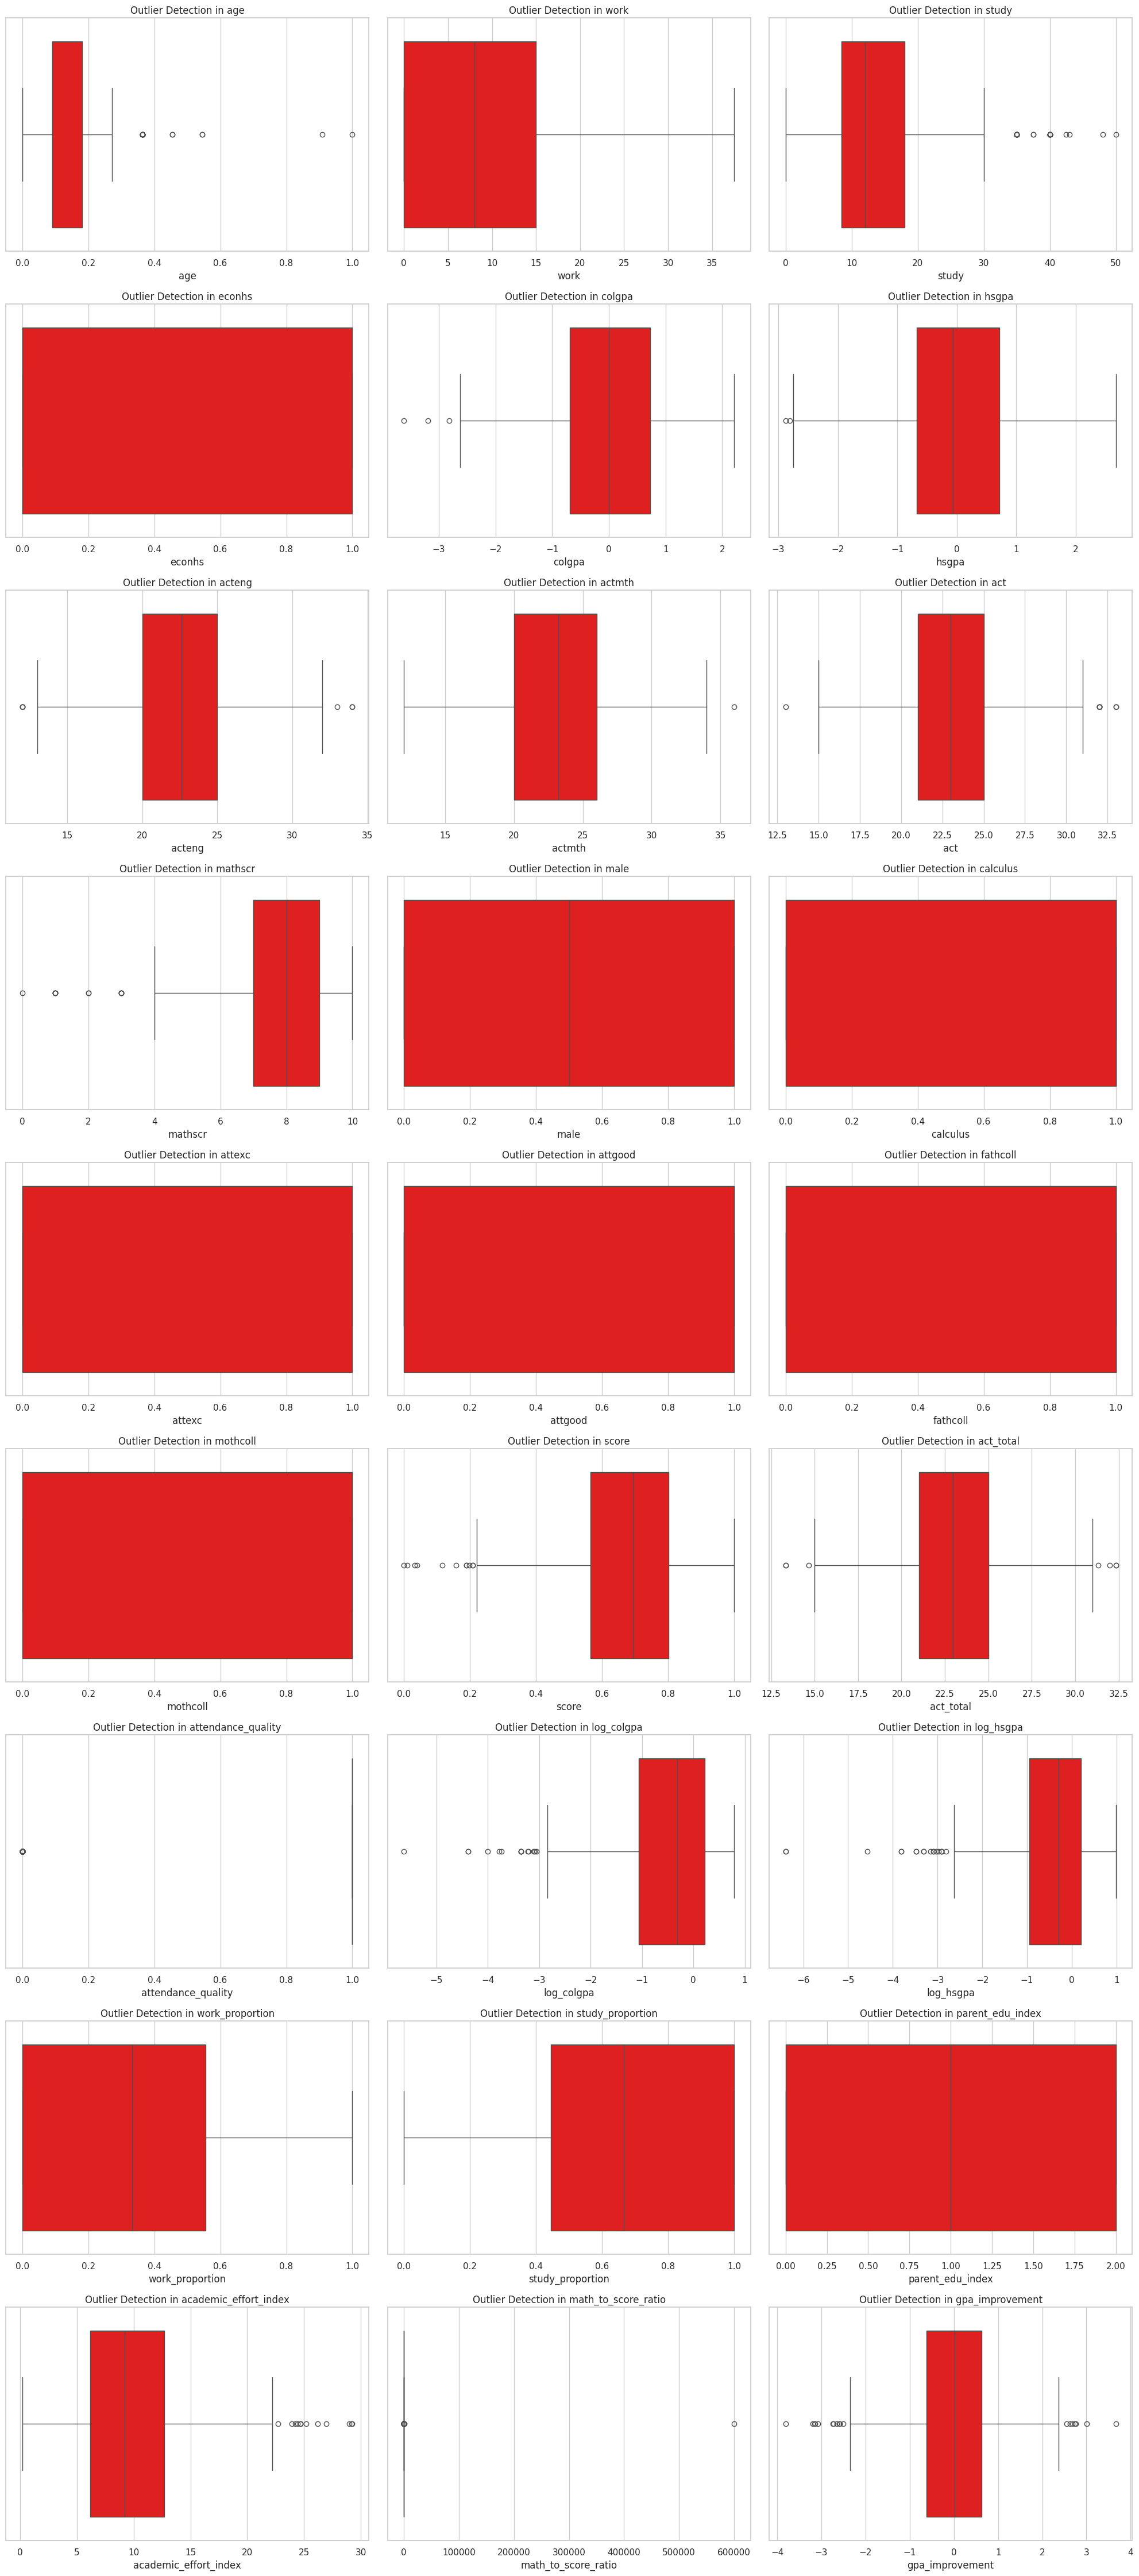

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Setting style for better visuals
sns.set_theme(style="whitegrid")

# 1. Univariate Analysis
# Updated Univariate Analysis
def univariate_analysis(data):
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    n_cols = 3  # Number of columns per row in the grid
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Calculate required rows

    # Histograms
    plt.figure(figsize=(20, 5 * n_rows))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(data[col], kde=True, bins=20, color='blue')
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

    # Box plots
    plt.figure(figsize=(20, 5 * n_rows))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.boxplot(x=data[col], color='green')
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


# 2. Bivariate Analysis
def bivariate_analysis(data):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='hsgpa', y='colgpa', hue='male', palette='coolwarm')
    plt.title("Relationship Between High School GPA and College GPA")
    plt.show()


# 3. Multivariate Analysis
def multivariate_analysis(data):
    # PCA for 3D visualization
    pca = PCA(n_components=3)
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).dropna(axis=1)
    pca_data = pca.fit_transform(numerical_cols)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=data['male'], cmap='viridis', s=50)
    ax.set_title('PCA 3D Visualization')
    plt.show()

# 4. Outlier Detection
# Updated Outlier Detection Function
def outlier_detection(data):
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    n_cols = 3  # Number of columns per row
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Calculate the required number of rows

    # Box plots for outlier detection
    plt.figure(figsize=(20, 5 * n_rows))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.boxplot(x=data[col], color='red')
        plt.title(f'Outlier Detection in {col}')
    plt.tight_layout()
    plt.show()




# Execute Visualization Functions
print("Univariate Analysis")
univariate_analysis(data)

print("Bivariate Analysis")
bivariate_analysis(data)

print("Multivariate Analysis")
multivariate_analysis(data)

print("Outlier Detection")
outlier_detection(data)


Performing Distribution Analysis...


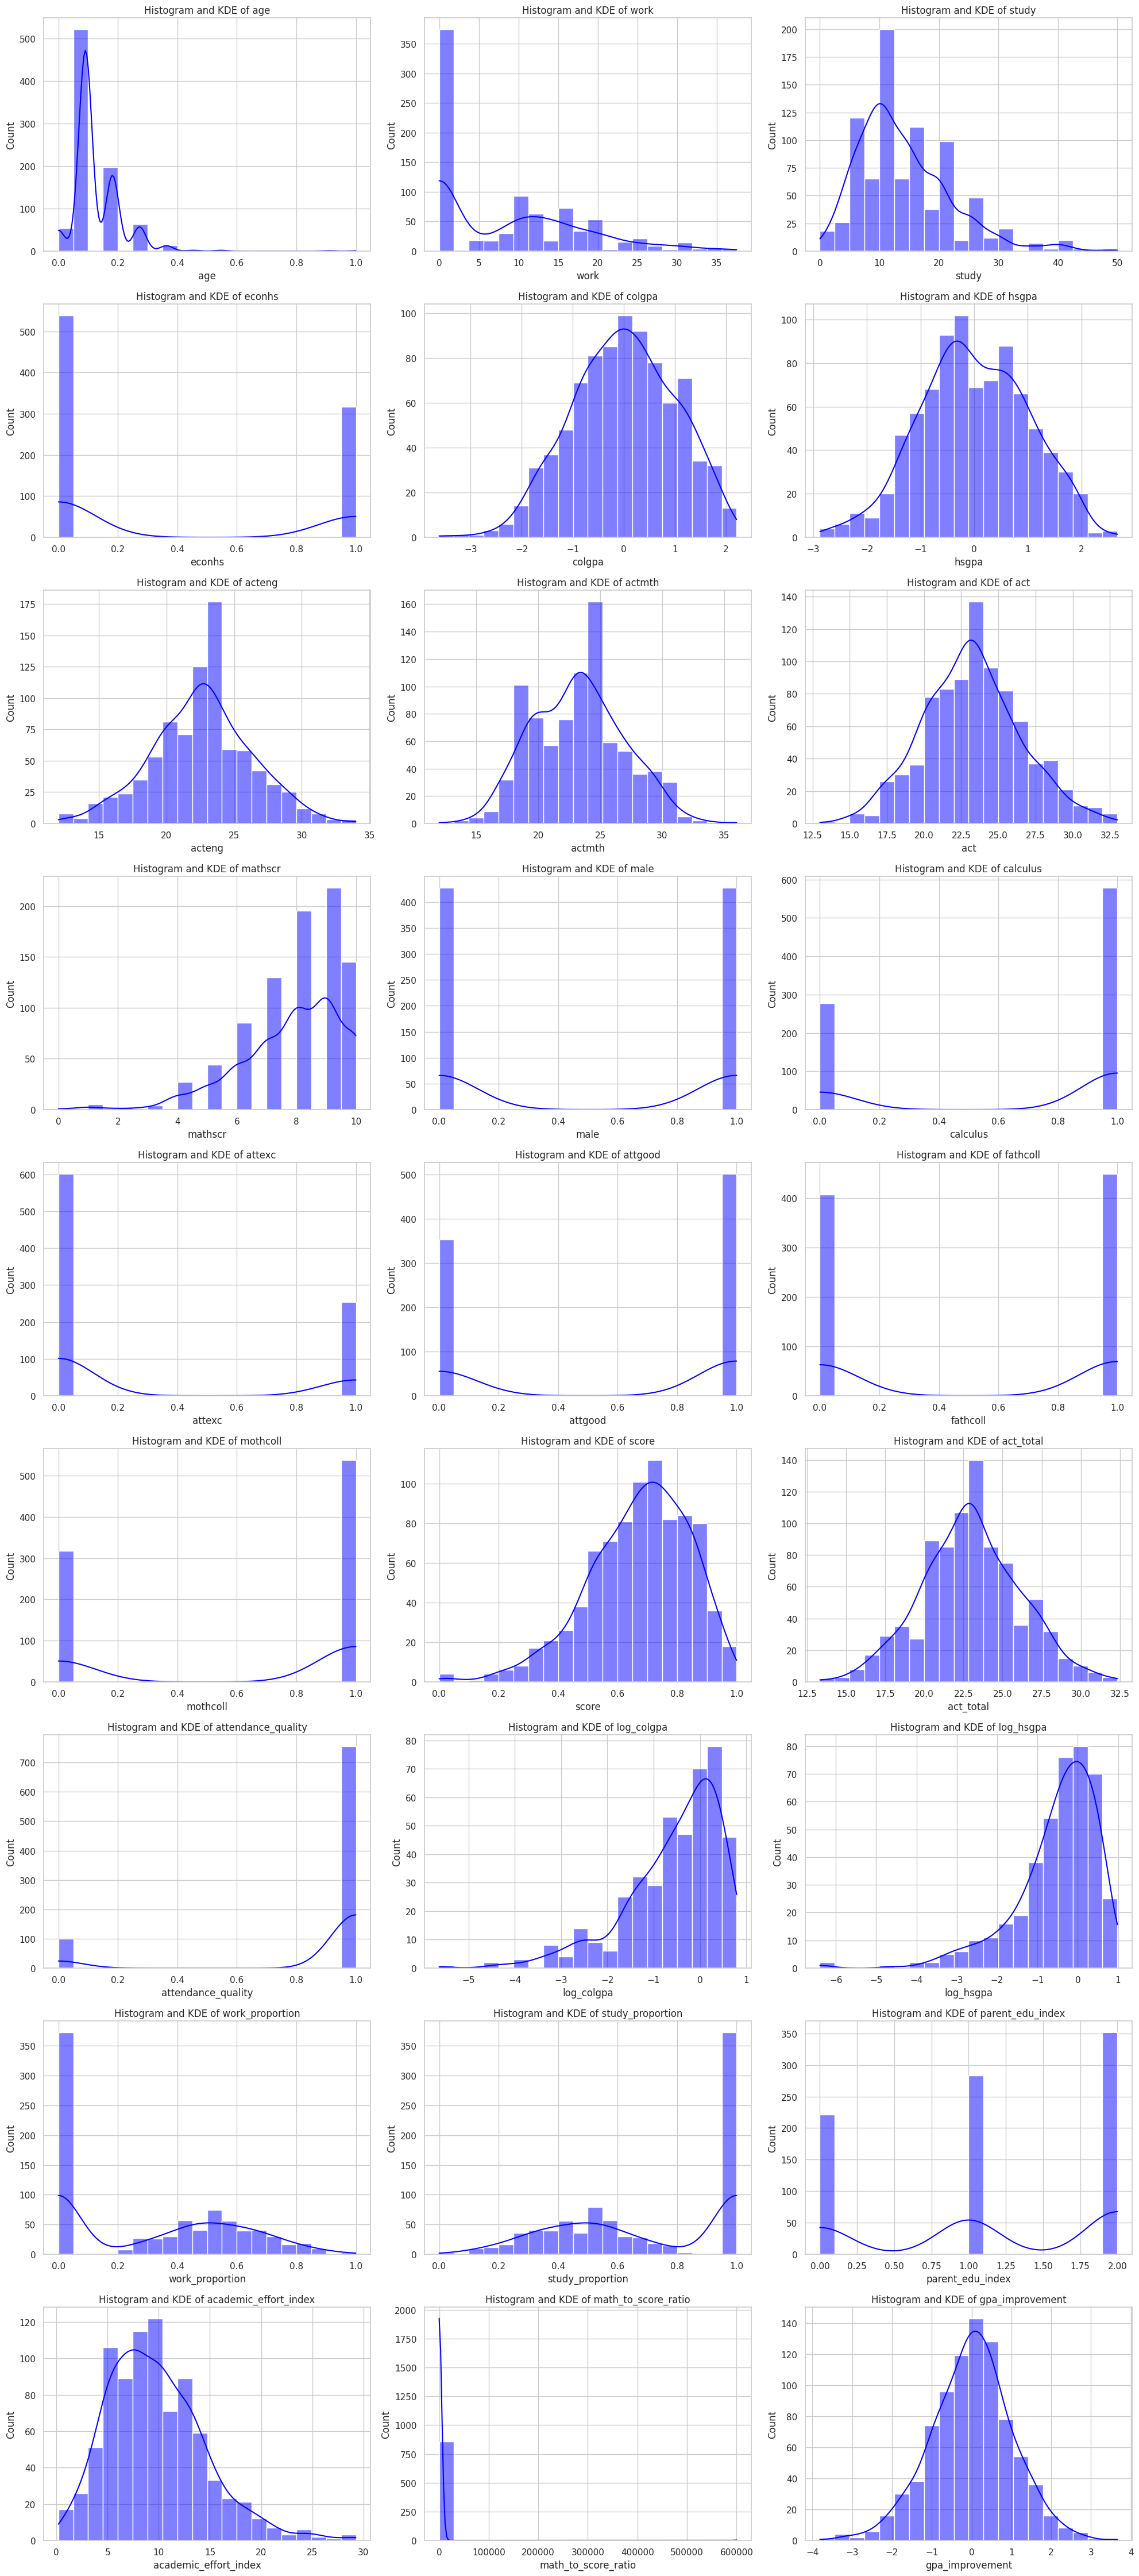

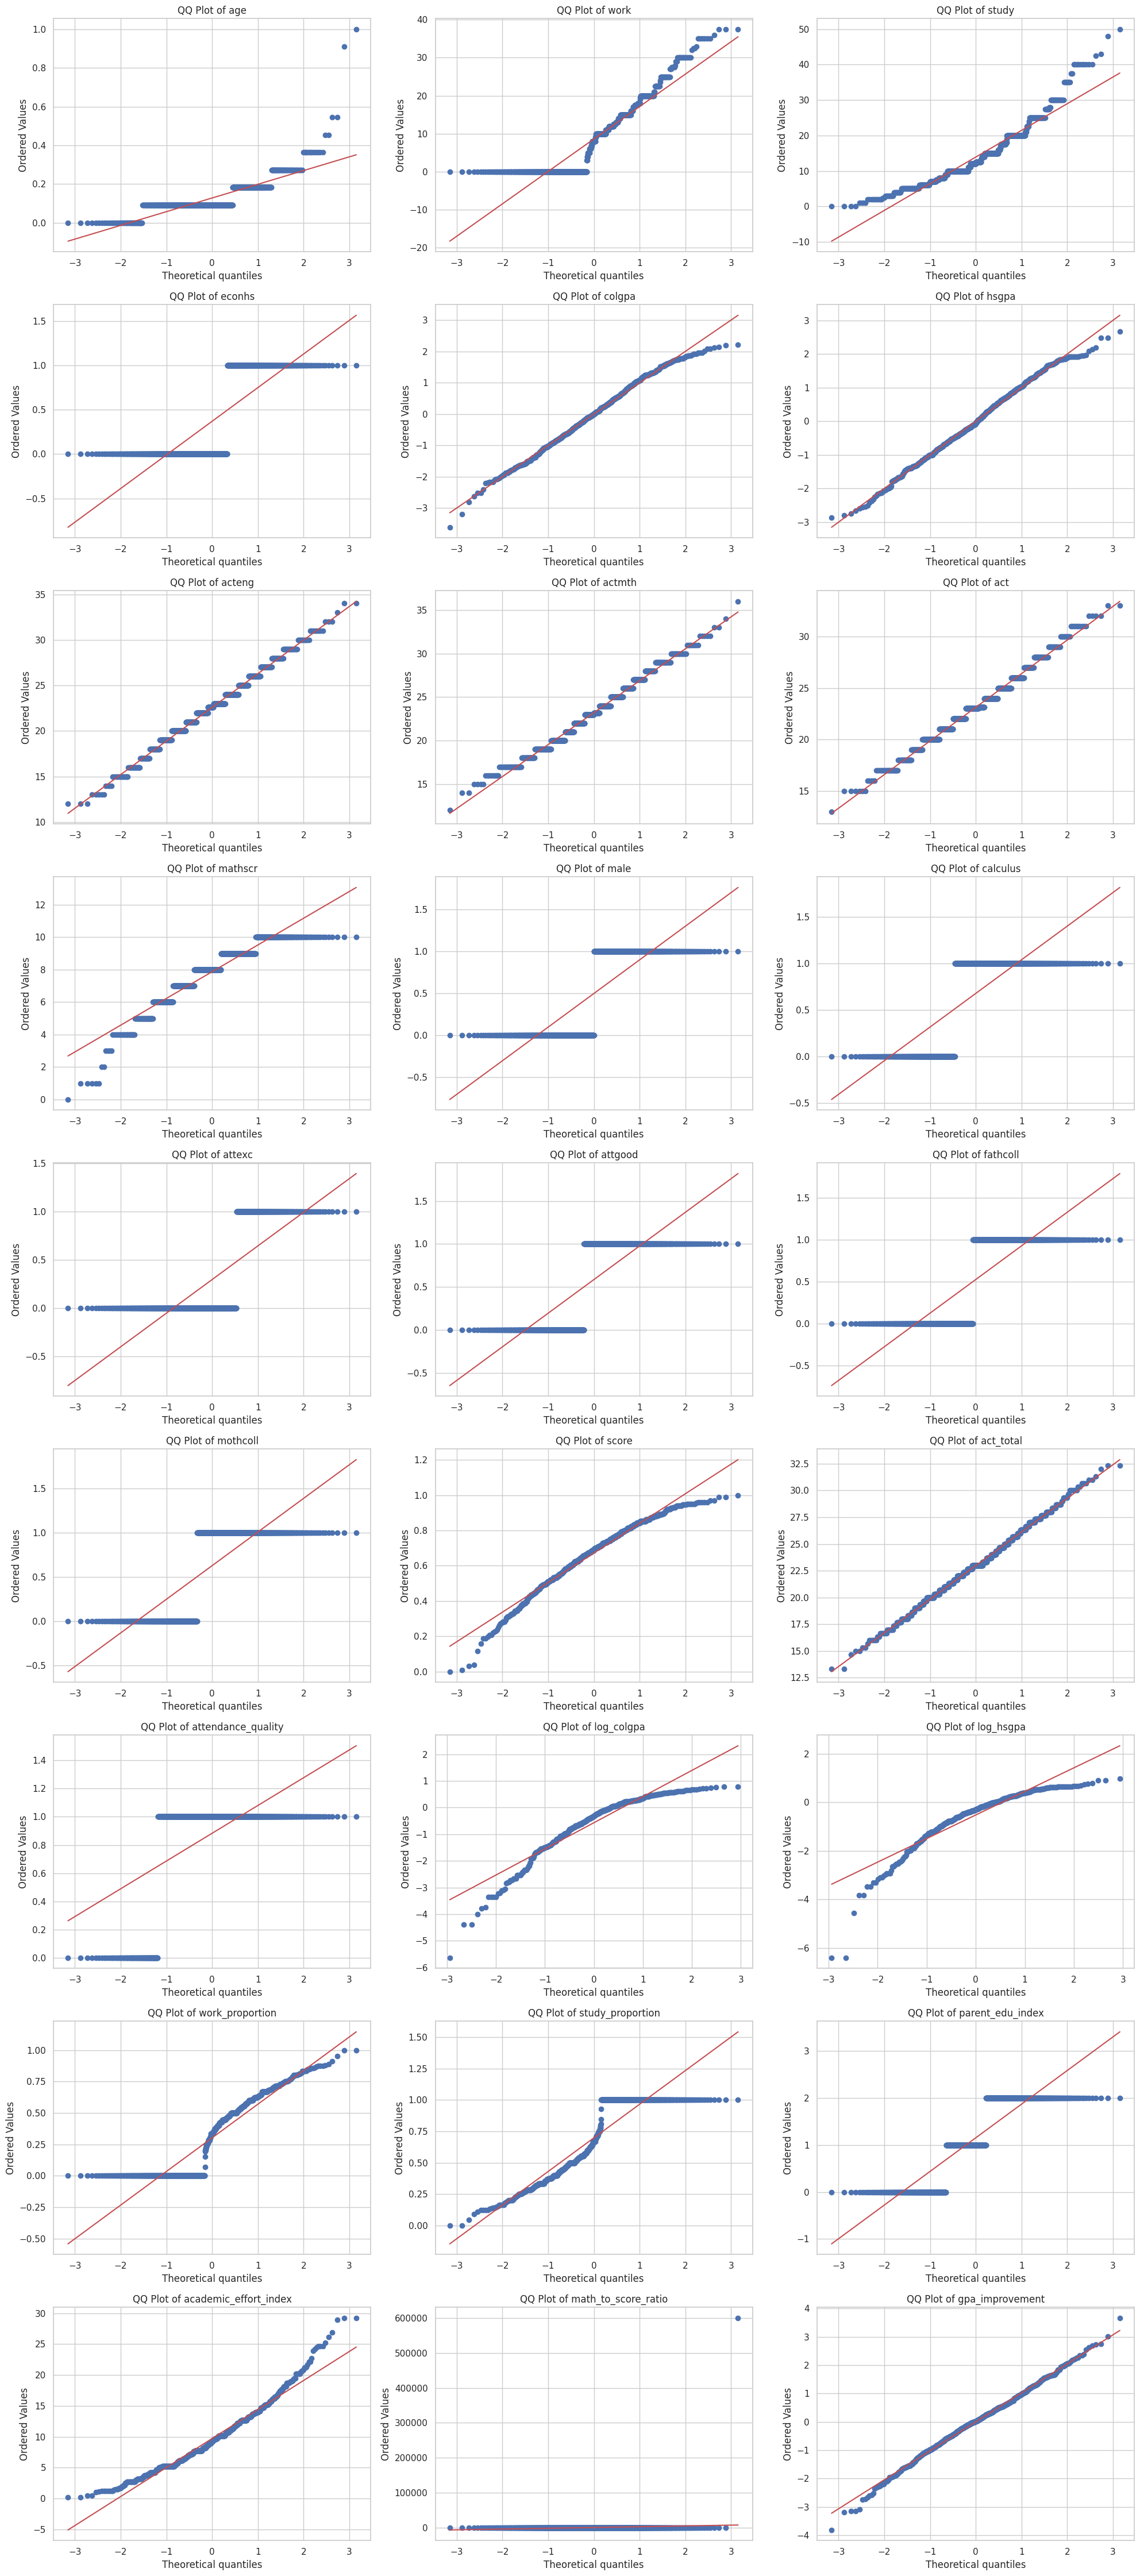

Exploring Data Relationships...


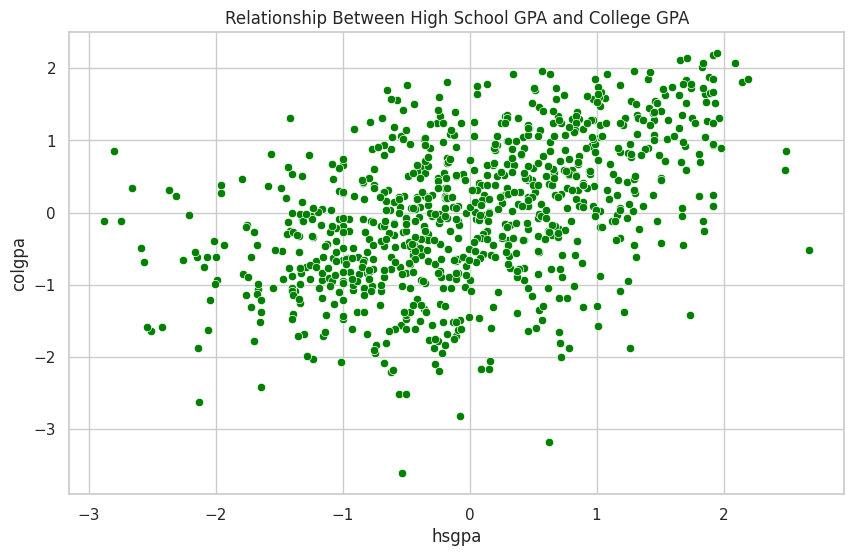

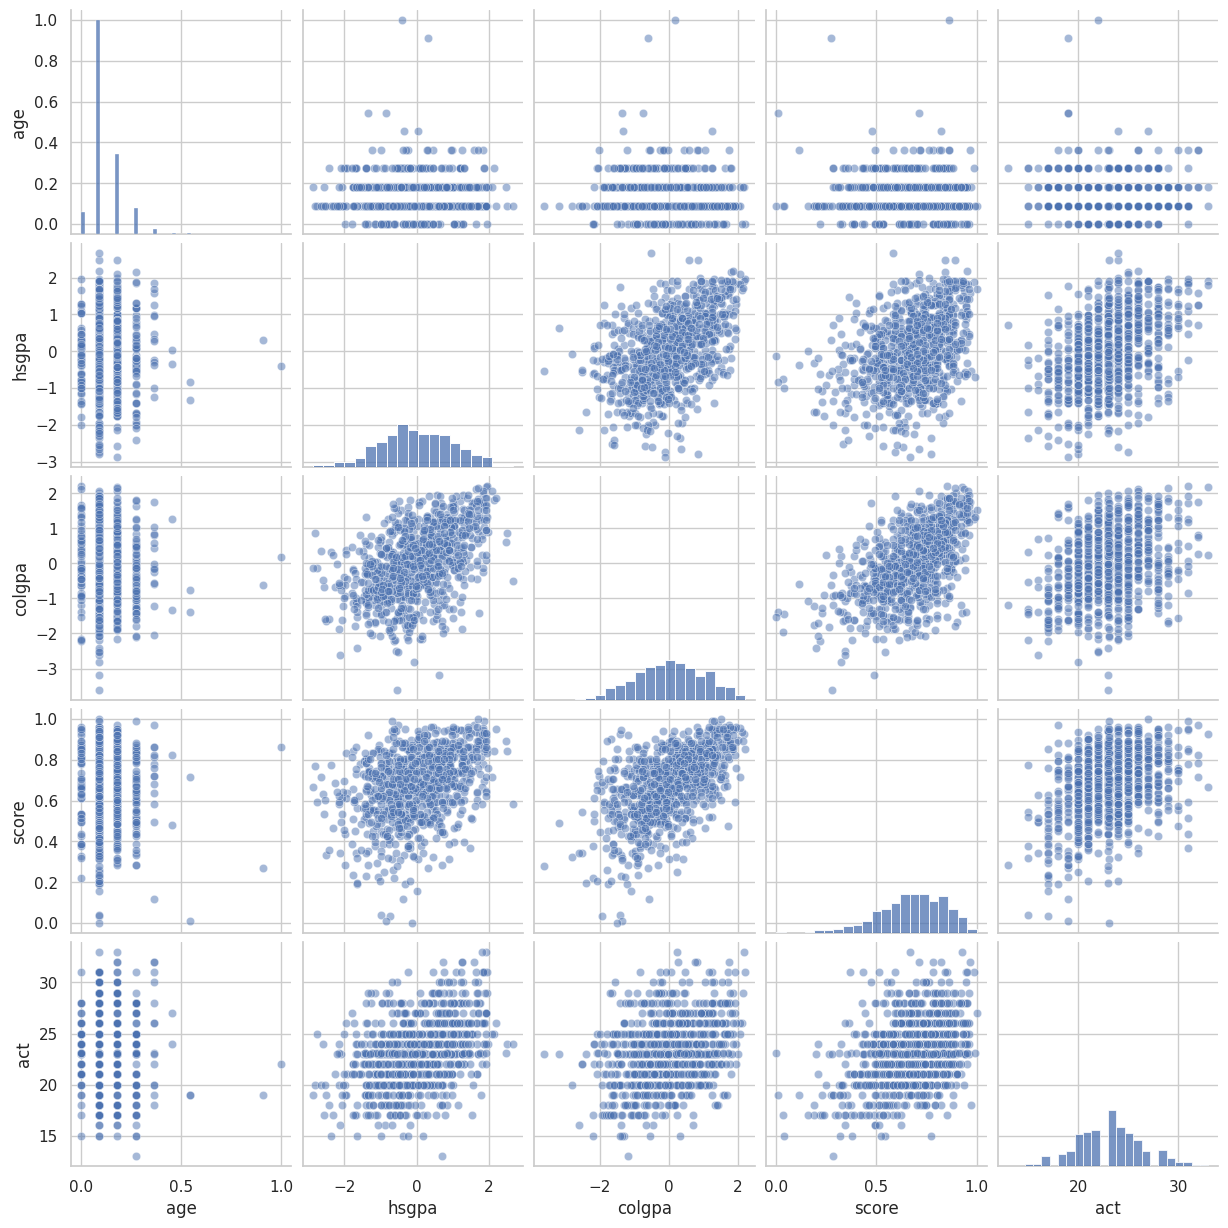

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Distribution Analysis
def distribution_analysis(data):
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    n_cols = 3  # Number of columns per row
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Calculate required rows to fit all variables

    # Histograms and KDE
    plt.figure(figsize=(20, 5 * n_rows))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(data[col], kde=True, color='blue', bins=20)
        plt.title(f'Histogram and KDE of {col}')
    plt.tight_layout()
    plt.show()

    # QQ plots to check normality
    from scipy.stats import probplot
    plt.figure(figsize=(20, 5 * n_rows))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        probplot(data[col].dropna(), dist="norm", plot=plt)
        plt.title(f'QQ Plot of {col}')
    plt.tight_layout()
    plt.show()

# Updated Data Relationships Function
def data_relationships(data):
    # Scatter plot to explore relationship between hsgpa and colgpa
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data['hsgpa'], y=data['colgpa'], color='green')  # Removed 'male' hue
    plt.title("Relationship Between High School GPA and College GPA")
    plt.show()

    # Pairplot to explore relationships between multiple variables
    pairplot_vars = ['age', 'hsgpa', 'colgpa', 'score', 'act']
    sns.pairplot(data[pairplot_vars], plot_kws={'alpha': 0.5})
    plt.show()


# Execute all the analysis functions
print("Performing Distribution Analysis...")
distribution_analysis(data)

print("Exploring Data Relationships...")
data_relationships(data)



In [18]:
from scipy import stats

# Hypothesis 1: t-test (Compare means of hsgpa for two groups based on calculus completion)
# Null hypothesis (H0): There is no difference in hsgpa between students who have and have not passed calculus.
# Alternative hypothesis (H1): There is a significant difference in hsgpa.

# Group the data by 'calculus' (assuming it's a binary variable)
group1 = data[data['calculus'] == 1]['hsgpa']  # Students who passed calculus
group2 = data[data['calculus'] == 0]['hsgpa']  # Students who didn't pass calculus

# Perform t-test
t_stat, p_value = stats.ttest_ind(group1, group2, nan_policy='omit')
print(f"T-test Results: t-statistic = {t_stat}, p-value = {p_value}")

# Interpretation: If p-value < 0.05, we reject the null hypothesis.

# Hypothesis 2: Chi-square test (Check if father's education level is independent of mother's education level)
# Null hypothesis (H0): Father's and mother's education levels are independent.
# Alternative hypothesis (H1): Father's and mother's education levels are not independent.

# Cross-tabulate the two categorical variables
contingency_table = pd.crosstab(data['fathcoll'], data['mothcoll'])

# Perform Chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square Test Results: chi2-statistic = {chi2_stat}, p-value = {p_value}, degrees of freedom = {dof}")

# Interpretation: If p-value < 0.05, we reject the null hypothesis.


T-test Results: t-statistic = 4.233064155442485, p-value = 2.5550887620175495e-05
Chi-square Test Results: chi2-statistic = 96.35076958953869, p-value = 9.623047469147469e-23, degrees of freedom = 1


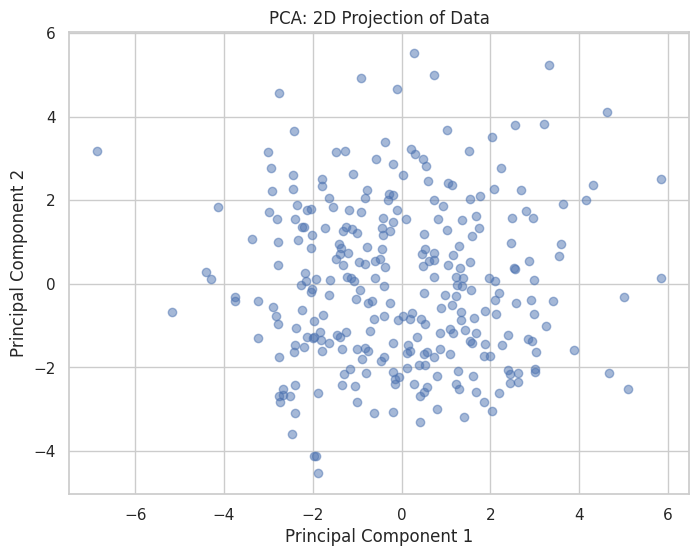

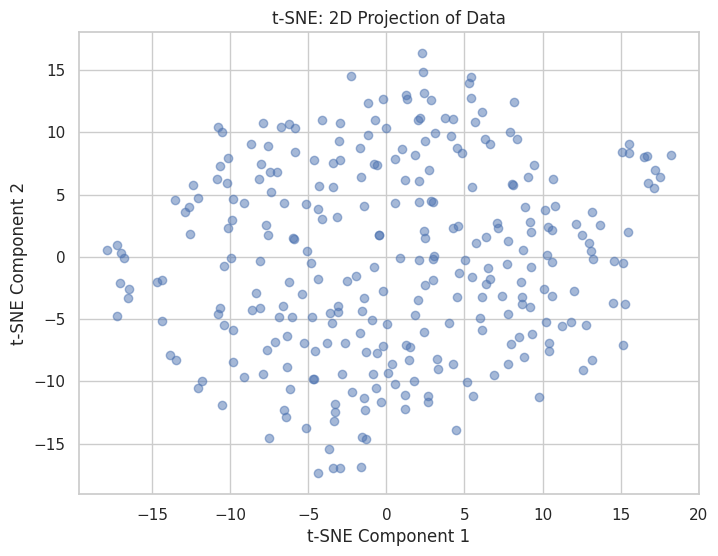

array([[-14.343992  ,  -5.113107  ],
       [ -3.6440575 , -15.434645  ],
       [  5.3946733 ,  14.4311495 ],
       [ -3.4261675 , -16.962513  ],
       [ -4.400349  , -17.37575   ],
       [-10.408365  ,  -5.451383  ],
       [ -7.59268   ,   8.927936  ],
       [ -1.1674727 ,   9.75352   ],
       [ -1.6762207 ,  -6.0970063 ],
       [  1.8378036 ,  -4.6304317 ],
       [ -9.953944  ,  -0.1287573 ],
       [ -1.6115488 , -16.861183  ],
       [  2.0059865 ,  -3.4246838 ],
       [-16.809145  ,  -0.08814698],
       [  5.2841687 ,  13.974775  ],
       [  5.553327  , -11.155687  ],
       [  8.863752  ,   4.0021996 ],
       [ -3.7793086 ,  -6.931     ],
       [ -9.848034  ,  -5.8857183 ],
       [ -2.9478574 , -16.969189  ],
       [ -5.989     ,   1.5061414 ],
       [ -1.4371    ,   4.094982  ],
       [ -7.7252836 ,   2.521024  ],
       [ 10.261414  ,   0.15844935],
       [ -8.593258  ,  -4.3001466 ],
       [  1.1708918 , -11.0954485 ],
       [ 14.583969  ,  -0.33998767],
 

In [19]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Dimensionality Reduction using PCA
def perform_pca(data):
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    X = data[numerical_cols].dropna()  # Drop missing values for PCA

    # Standardize the data before PCA
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # PCA
    pca = PCA(n_components=2)  # Reduce to 2 components
    pca_result = pca.fit_transform(X_scaled)

    # Plot the PCA result
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
    plt.title("PCA: 2D Projection of Data")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

    return pca_result

# Dimensionality Reduction using t-SNE
def perform_tsne(data):
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    X = data[numerical_cols].dropna()  # Drop missing values for t-SNE

    # Standardize the data before t-SNE
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(X_scaled)

    # Plot the t-SNE result
    plt.figure(figsize=(8, 6))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5)
    plt.title("t-SNE: 2D Projection of Data")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.show()

    return tsne_result

# Execute PCA and t-SNE
perform_pca(data)
perform_tsne(data)
